In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('eye_cancer_patients.csv')
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

In [5]:
df['Patient_ID'].unique()

array(['PID00001', 'PID00002', 'PID00003', ..., 'PID04998', 'PID04999',
       'PID05000'], dtype=object)

In [6]:
df['Patient_ID'].nunique() #all are unique values so there are no duplicate records

5000

In [7]:
df['Age'].unique()

array([58, 15, 64, 33,  8, 41, 67, 26,  5, 23, 63, 22, 62, 69, 72, 86, 11,
        4, 27, 46,  3, 54, 44, 87, 39, 75, 36, 28, 12, 50, 51, 31, 35, 53,
       90, 84, 17, 16, 68, 81, 77, 79, 40, 47, 76, 30,  9, 34, 56, 66, 43,
       19, 10, 85, 71, 29, 49, 21, 20, 48, 74, 13, 25, 18,  1, 59, 24,  2,
       70, 89, 60, 37, 82, 32, 78, 65, 42,  7,  6, 52, 83, 55, 73, 80, 57,
       88, 38, 45, 14, 61], dtype=int64)

In [8]:
df['Age'].nunique()

90

In [9]:
df['Gender'].unique()

array(['F', 'Other', 'M'], dtype=object)

In [10]:
df['Gender'].value_counts()

Gender
Other    1720
M        1652
F        1628
Name: count, dtype: int64

In [11]:
df['Cancer_Type'].unique()

array(['Retinoblastoma', 'Melanoma', 'Lymphoma'], dtype=object)

In [12]:
df['Cancer_Type'].value_counts()

Cancer_Type
Melanoma          1691
Retinoblastoma    1672
Lymphoma          1637
Name: count, dtype: int64

In [13]:
df['Laterality'].unique()

array(['Left', 'Right', 'Bilateral'], dtype=object)

In [14]:
df['Laterality'].value_counts()

Laterality
Bilateral    1695
Left         1686
Right        1619
Name: count, dtype: int64

In [15]:
df['Date_of_Diagnosis'].unique()

array(['2019-01-25', '2021-10-21', '2021-03-12', ..., '2021-01-13',
       '2021-11-28', '2024-08-02'], dtype=object)

In [16]:
df['Date_of_Diagnosis'].nunique()

1957

In [17]:
df['Stage_at_Diagnosis'].unique()

array(['Stage IV', 'Stage III', 'Stage II', 'Stage I'], dtype=object)

In [18]:
df['Stage_at_Diagnosis'].value_counts()

Stage_at_Diagnosis
Stage II     1287
Stage III    1281
Stage IV     1242
Stage I      1190
Name: count, dtype: int64

In [19]:
df['Treatment_Type'].unique()

array(['Radiation', 'Chemotherapy', 'Surgery'], dtype=object)

In [20]:
df['Treatment_Type'].value_counts()

Treatment_Type
Surgery         1679
Chemotherapy    1665
Radiation       1656
Name: count, dtype: int64

In [21]:
df['Surgery_Status'].unique()

array([False,  True])

In [22]:
df['Surgery_Status'].value_counts()

Surgery_Status
True     2550
False    2450
Name: count, dtype: int64

In [23]:
df['Radiation_Therapy'].unique()

array([15, 69, 47, 36, 14, 11, 50, 46, 48, 42, 45, 65, 49, 51,  2,  1, 10,
        4, 59, 21, 25, 16, 32, 41, 70, 30, 18, 37, 40, 28, 62, 17,  7, 12,
       60, 29, 52, 31,  0, 24,  3, 63, 64, 34, 44, 22, 58, 55, 67, 27, 68,
       53, 56,  5, 35, 26, 23, 61,  8, 54, 66, 19, 39, 13, 20, 38, 43, 33,
       57,  9,  6], dtype=int64)

In [24]:
df['Radiation_Therapy'].nunique()

71

In [25]:
df['Chemotherapy'].unique()

array([ 3,  6, 14, 17,  2, 13,  7, 15,  5, 20,  4, 11,  1, 19,  8,  9, 16,
       12, 10, 18,  0], dtype=int64)

In [26]:
df['Chemotherapy'].nunique()

21

In [27]:
df['Outcome_Status'].unique()

array(['Deceased', 'In Remission', 'Active'], dtype=object)

In [28]:
df['Outcome_Status'].value_counts()

Outcome_Status
Deceased        1710
In Remission    1675
Active          1615
Name: count, dtype: int64

In [29]:
df['Survival_Time_Months'].unique()

array([ 85,  10,   3,  40,  26,  15,  93,   9,  12, 116,  99,  25,  30,
       104,  56,  43,  82,  16, 111,  33,  70,  94,  34,  63,  77,  50,
       105, 101,  91,  60,  41,  42,  75,  53,  86,  95, 112,  76, 119,
        17,   4,  14,  31, 118,  84, 114,  64,  32,  68,  47,  23,  51,
       109,  48,  67,  90, 102, 113,  54,  83,  28, 120,  88, 107,  79,
        45,   7,  55, 110,   1,  98,  81,  11,  57,  49,  19,  96,  69,
         8,  87,  22,  71, 117,  13,  92,  80, 100,  38,  37,  24,  72,
        74,  62,  65,  78, 115,  66,   2,  44,   6,  39,  73, 103,  61,
        97,  35,  89, 108,   5,  58, 106,  20,  52,  59,  21,  27,  46,
        36,  18,  29], dtype=int64)

In [30]:
df['Survival_Time_Months'].nunique()

120

In [31]:
df['Genetic_Markers'].unique()

array([nan, 'BRAF Mutation'], dtype=object)

In [32]:
df['Genetic_Markers'].value_counts()

Genetic_Markers
BRAF Mutation    2503
Name: count, dtype: int64

In [33]:
df['Family_History'].unique()

array([ True, False])

In [34]:
df['Family_History'].value_counts()

Family_History
False    2538
True     2462
Name: count, dtype: int64

In [35]:
df['Country'].unique()

array(['UK', 'Japan', 'Canada', 'USA', 'Australia', 'Germany',
       'South Africa', 'Brazil', 'France', 'India'], dtype=object)

In [36]:
df['Country'].nunique()

10

In [37]:
df['Country'].value_counts()

Country
South Africa    544
Australia       513
France          505
UK              504
Japan           496
India           495
Brazil          491
USA             489
Canada          486
Germany         477
Name: count, dtype: int64

In [38]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Cancer_Type                0
Laterality                 0
Date_of_Diagnosis          0
Stage_at_Diagnosis         0
Treatment_Type             0
Surgery_Status             0
Radiation_Therapy          0
Chemotherapy               0
Outcome_Status             0
Survival_Time_Months       0
Genetic_Markers         2497
Family_History             0
Country                    0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
continuous = ['Age','Radiation_Therapy','Chemotherapy','Survival_Time_Months']
discrete = ['Gender','Cancer_Type','Laterality','Stage_at_Diagnosis','Treatment_Type','Surgery_Status','Outcome_Status','Genetic_Markers','Family_History','Country']

In [41]:
df[discrete].describe()

,Gender,Cancer_Type,Laterality,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Outcome_Status,Genetic_Markers,Family_History,Country
count,5000,5000,5000,5000,5000,5000,5000,2503,5000,5000
unique,3,3,3,4,3,2,3,1,2,10
top,Other,Melanoma,Bilateral,Stage II,Surgery,True,Deceased,BRAF Mutation,False,South Africa
freq,1720,1691,1695,1287,1679,2550,1710,2503,2538,544


In [42]:
df[continuous].describe()

,Age,Radiation_Therapy,Chemotherapy,Survival_Time_Months
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.008000,35.447600,10.057400,60.716000
std,25.934387,20.565754,6.030968,34.549774
min,1.000000,0.000000,0.000000,1.000000
25%,22.000000,18.000000,5.000000,31.000000
50%,44.000000,35.000000,10.000000,60.000000
75%,67.000000,53.000000,15.000000,90.000000
max,90.000000,70.000000,20.000000,120.000000


In [43]:
df[continuous].skew()

Age                     0.015507
Radiation_Therapy      -0.005103
Chemotherapy           -0.018757
Survival_Time_Months    0.003887
dtype: float64

<Axes: >

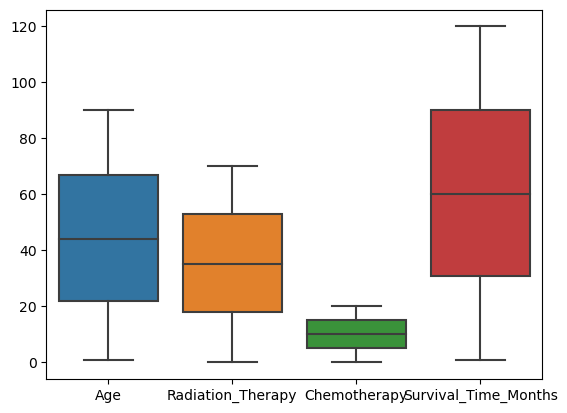

In [44]:
sns.boxplot(df[continuous])

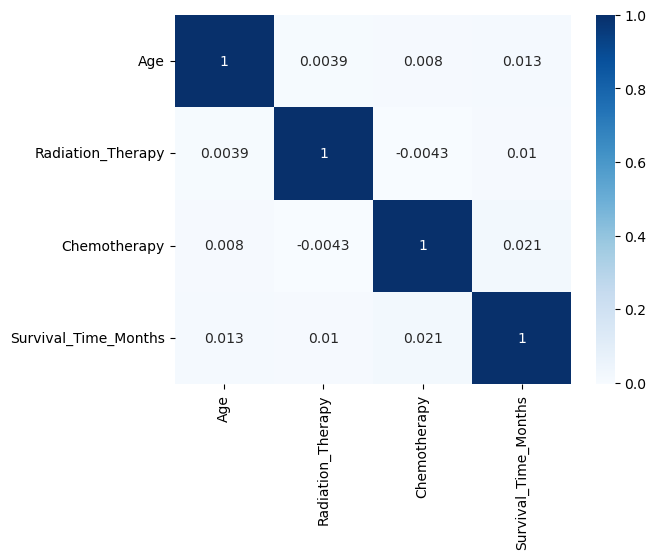

In [45]:
sns.heatmap(df[continuous].corr(),annot=True,cmap='Blues')
plt.show()

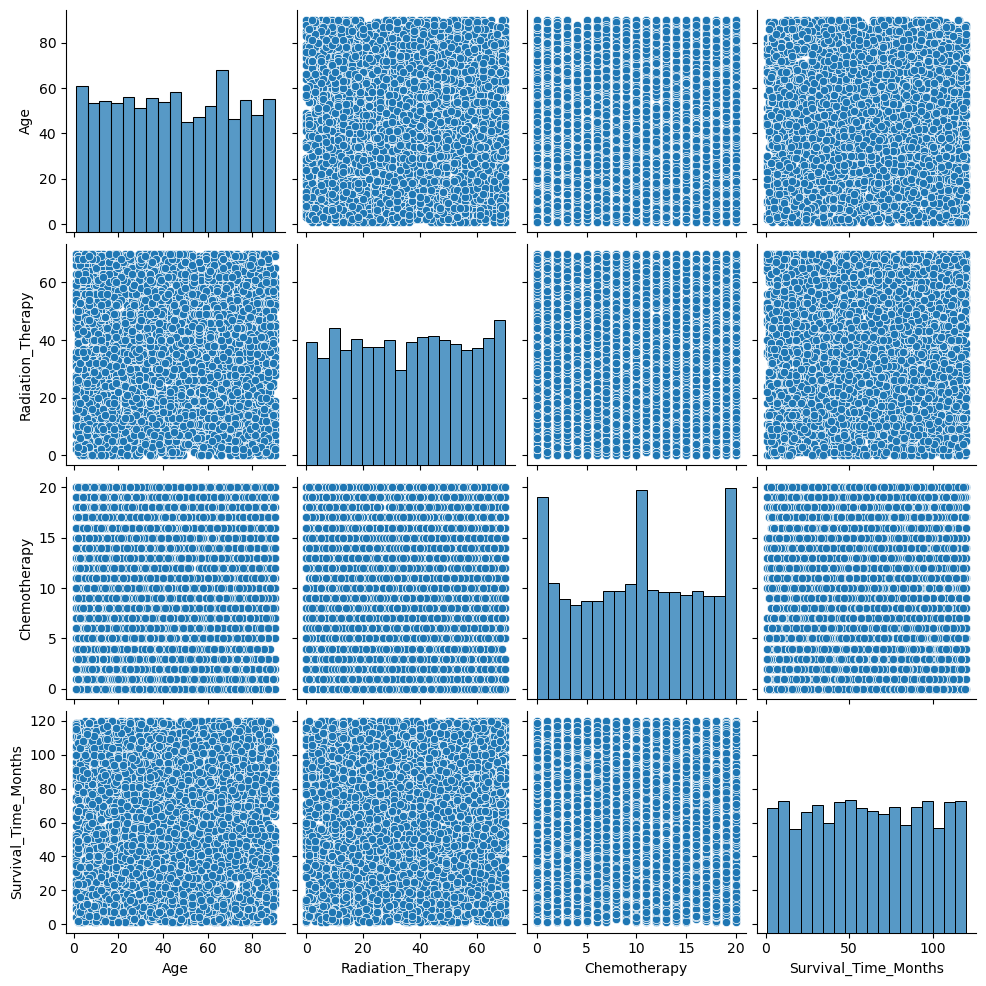

In [46]:
sns.pairplot(df[continuous])
plt.show()

## DP

In [47]:
df.drop(columns=['Patient_ID','Date_of_Diagnosis'],inplace=True)

In [48]:
df['Stage_at_Diagnosis']=df['Stage_at_Diagnosis'].map({'Stage I':0,'Stage II':1,'Stage III':2,'Stage IV':3})

In [49]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [50]:
df['Surgery_Status'] = df['Surgery_Status'].astype(int)
df['Family_History'] = df['Family_History'].astype(int)

In [51]:
df.head()

,Age,Stage_at_Diagnosis,Surgery_Status,Radiation_Therapy,Chemotherapy,Survival_Time_Months,Family_History,Gender_M,Gender_Other,Cancer_Type_Melanoma,Cancer_Type_Retinoblastoma,Laterality_Left,Laterality_Right,Treatment_Type_Radiation,Treatment_Type_Surgery,Outcome_Status_Deceased,Outcome_Status_In Remission,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_South Africa,Country_UK,Country_USA
0,58,3,0,15,3,85,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,15,2,1,69,6,10,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,64,3,0,47,6,3,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,33,1,1,36,6,40,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,8,0,0,14,14,26,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)

pc = PCA(n_components=0.95)
pca_df = pc.fit_transform(sc_df)

In [53]:
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-1.128754,-1.389468,2.102196,-0.465460,0.127670,2.675394,-1.620175,0.673905,-0.740029,-0.662926,-0.308082,0.901125,-0.234673,1.342178,0.288647,1.225257,0.413031,-0.684262,0.626624,1.208727,-0.145384,-0.796387,0.595604
1,-1.108362,-0.647606,-1.828013,0.171223,2.065395,-0.735172,0.985673,-0.830604,-1.099231,-0.798311,0.379503,-0.039292,2.298438,1.676778,-0.982031,-2.129204,0.629998,0.094238,-0.342948,0.170210,-1.133299,0.572867,0.475312
2,0.672987,-1.661442,-1.618691,1.493226,-0.687521,2.700103,-1.005399,-0.098332,-0.895396,-0.869761,-0.104298,1.030888,-0.236963,0.542426,-0.086026,0.074885,1.044404,1.238733,-1.829530,0.945224,0.472274,-0.146754,-0.647274
3,1.107168,0.040738,-0.491563,-2.399190,-0.383190,0.547868,0.887262,0.104286,0.039736,1.801079,-1.480814,-1.382552,0.613052,-1.805263,-1.062628,-0.696160,0.643193,0.532557,-0.121850,0.782233,-0.526495,-0.010172,-1.044990
4,-2.251488,0.607489,-0.718992,0.821615,-0.439183,-0.699837,-1.516481,2.345716,-0.456001,0.329438,1.339603,-0.208264,-0.198101,-0.340825,-1.780955,-0.464888,-0.711444,-0.602656,-0.229682,-1.761170,-0.454295,0.178898,0.734972


## M

In [54]:
wcss=[]
for k in range(1,24):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
print(wcss)

[124621.08204548767, 118500.820966091, 113626.463168786, 108565.52962498076, 102739.3711205933, 97402.12058836708, 92147.81183175331, 87076.16336830493, 82459.25114265936, 80043.38824027518, 79346.5499123222, 78729.83745140934, 78105.30591345477, 77524.40209527744, 76731.77868486618, 76122.56711656632, 75794.39483203657, 74993.26862740083, 74558.52521698979, 74229.31011151624, 73699.68795580653, 73009.60033823903, 72833.48980136879]


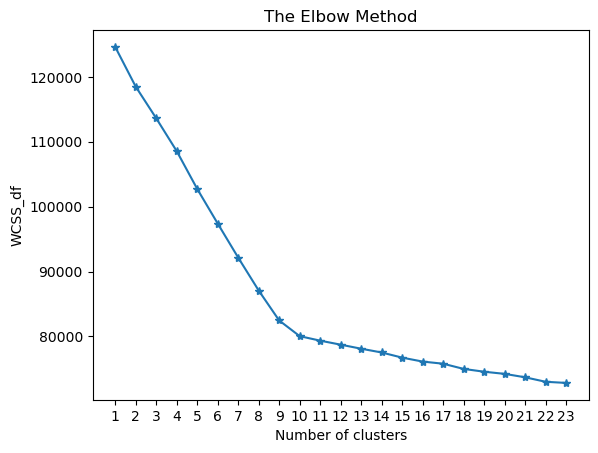

In [55]:
plt.plot(range(1,24),wcss,marker='*')
plt.xticks(range(1,24))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_df')
plt.show()

In [56]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-1.128754,-1.389468,2.102196,-0.465460,0.127670,2.675394,-1.620175,0.673905,-0.740029,-0.662926,-0.308082,0.901125,-0.234673,1.342178,0.288647,1.225257,0.413031,-0.684262,0.626624,1.208727,-0.145384,-0.796387,0.595604
1,-1.108362,-0.647606,-1.828013,0.171223,2.065395,-0.735172,0.985673,-0.830604,-1.099231,-0.798311,0.379503,-0.039292,2.298438,1.676778,-0.982031,-2.129204,0.629998,0.094238,-0.342948,0.170210,-1.133299,0.572867,0.475312
2,0.672987,-1.661442,-1.618691,1.493226,-0.687521,2.700103,-1.005399,-0.098332,-0.895396,-0.869761,-0.104298,1.030888,-0.236963,0.542426,-0.086026,0.074885,1.044404,1.238733,-1.829530,0.945224,0.472274,-0.146754,-0.647274
3,1.107168,0.040738,-0.491563,-2.399190,-0.383190,0.547868,0.887262,0.104286,0.039736,1.801079,-1.480814,-1.382552,0.613052,-1.805263,-1.062628,-0.696160,0.643193,0.532557,-0.121850,0.782233,-0.526495,-0.010172,-1.044990
4,-2.251488,0.607489,-0.718992,0.821615,-0.439183,-0.699837,-1.516481,2.345716,-0.456001,0.329438,1.339603,-0.208264,-0.198101,-0.340825,-1.780955,-0.464888,-0.711444,-0.602656,-0.229682,-1.761170,-0.454295,0.178898,0.734972


In [58]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=10,init='k-means++',random_state = True)
df['km_cluster']=kmeans.fit_predict(pca_df)
df['km_cluster'].unique()

array([1, 7, 0, 5, 6, 4, 8, 9, 3, 2])

In [59]:
from sklearn.cluster import AgglomerativeClustering as ac
hc = ac(n_clusters = 10, metric = 'euclidean', linkage = 'ward')
df['h_cluster'] = hc.fit_predict(pca_df)
df['h_cluster'].unique()

array([1, 7, 3, 5, 9, 4, 0, 2, 6, 8], dtype=int64)

In [93]:
df['h_cluster'].value_counts()

h_cluster
0    545
9    518
6    506
1    504
7    495
5    492
3    489
2    489
8    485
4    477
Name: count, dtype: int64

In [94]:
df['km_cluster'].value_counts()

km_cluster
8    544
6    513
3    505
1    504
7    496
2    495
9    491
5    489
0    486
4    477
Name: count, dtype: int64